In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("cars24data.csv")

In [3]:
df.head()

,Unnamed: 0,name,selling_price,km_driven,fuel,transmission
0,0,2014 Maruti Swift Dzire,"3,54,799","76,013 km",Diesel,Manual
1,1,2015 Tata Nano,"1,87,999","39,703 km",Petrol,Manual
2,2,2012 Maruti Swift,"2,60,099","1,20,326 km",Diesel,Manual
3,3,2012 Maruti Swift,"2,82,099","68,206 km",Diesel,Manual
4,4,2015 Tata Nano,"1,85,999","43,402 km",Petrol,Manual


In [4]:
df.shape

(492, 6)

We have 492 rows and 6 columns in data

In [5]:
df.isnull().sum()

Unnamed: 0       0
name             0
selling_price    0
km_driven        0
fuel             0
transmission     0
dtype: int64

there is no null values in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     492 non-null    int64 
 1   name           492 non-null    object
 2   selling_price  492 non-null    object
 3   km_driven      492 non-null    object
 4   fuel           492 non-null    object
 5   transmission   492 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.2+ KB


There are 5 object and 1 numerical columns in data

In [7]:
df['fuel'].value_counts() # Value counts of Fuel type

Diesel    357
Petrol    135
Name: fuel, dtype: int64

In [8]:
df['transmission'].value_counts() # Value counts of transmission

Manual    492
Name: transmission, dtype: int64

In [9]:
df.describe()

,Unnamed: 0
count,492.000000
mean,245.500000
std,142.172431
min,0.000000
25%,122.750000
50%,245.500000
75%,368.250000
max,491.000000


### EDA

<AxesSubplot:>

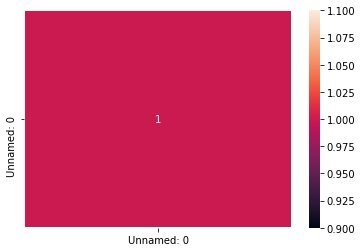

In [11]:
dfcorr=df.corr()
sns.heatmap(dfcorr,annot=True, linewidth=1)

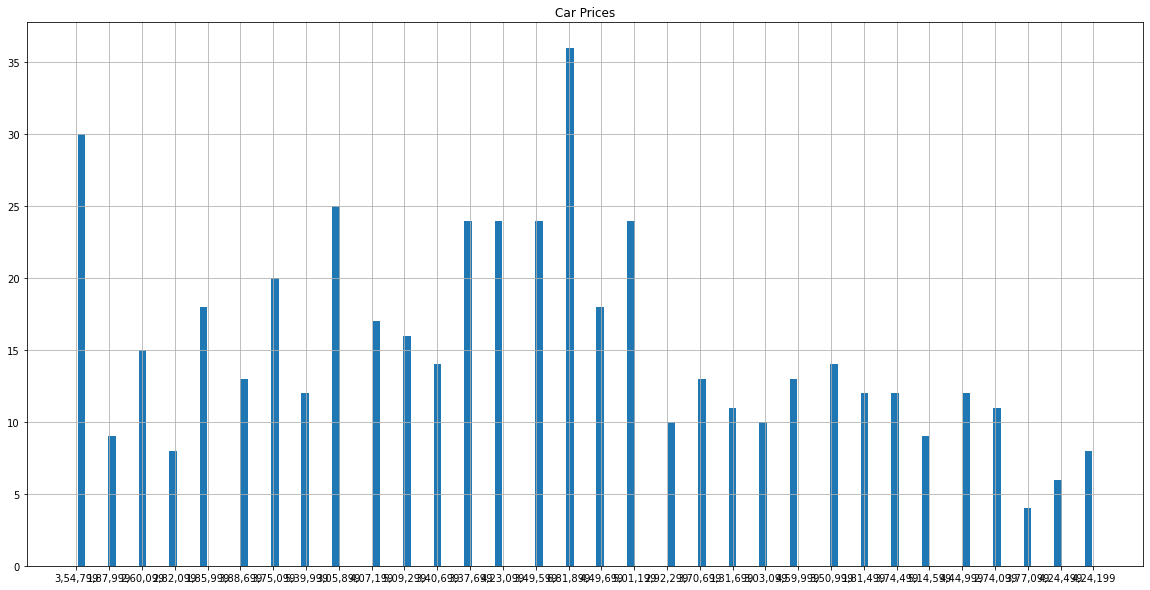

In [12]:
df['selling_price'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

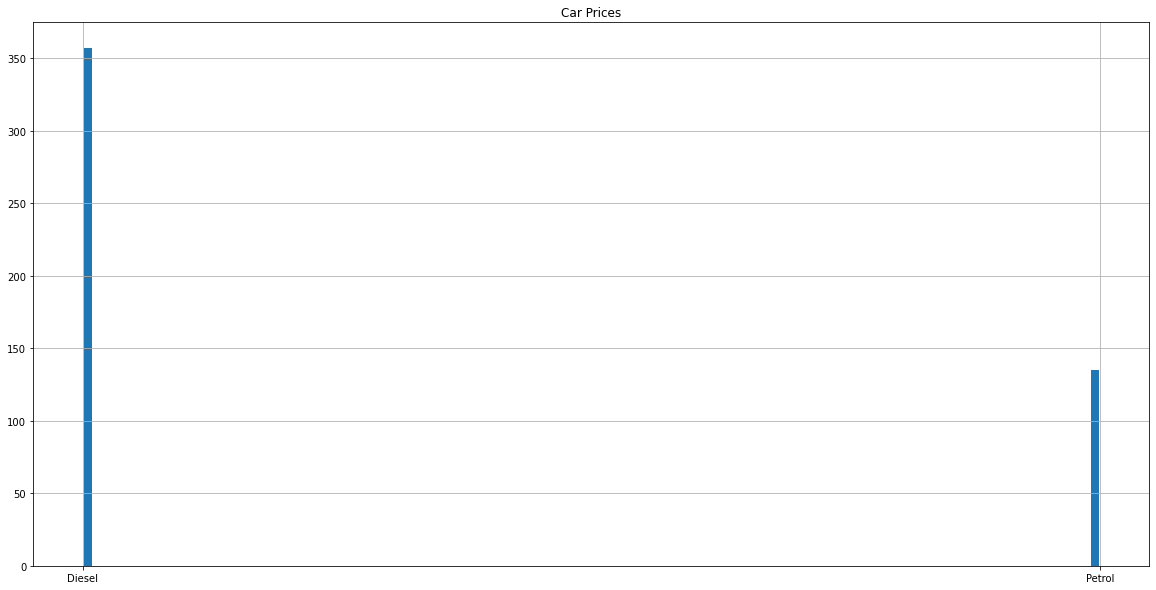

In [13]:
df['fuel'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

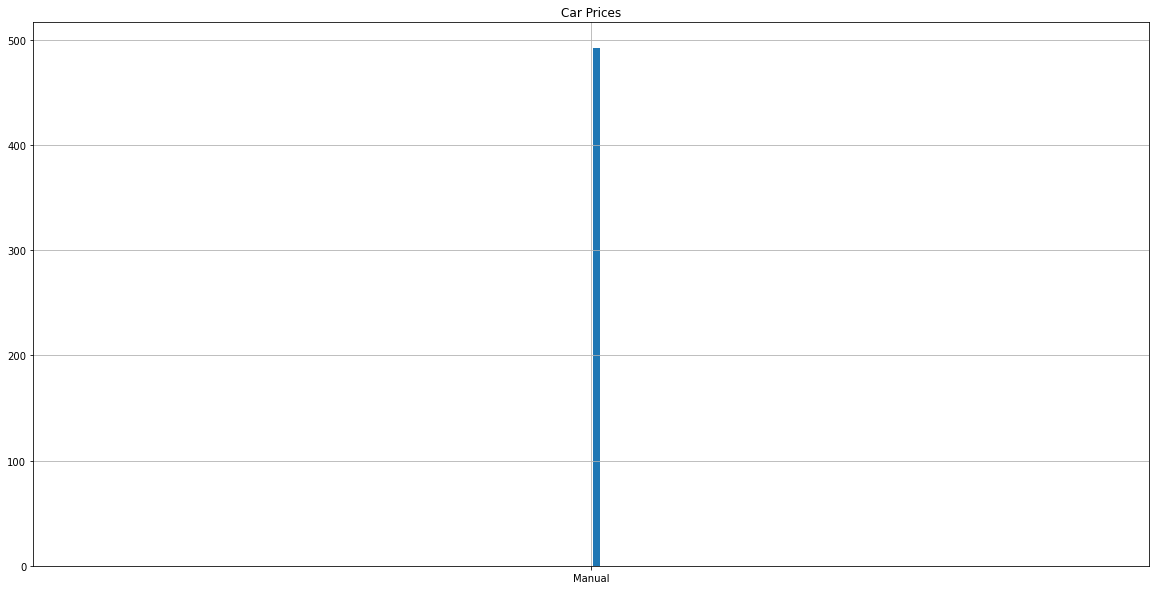

In [14]:
df['transmission'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

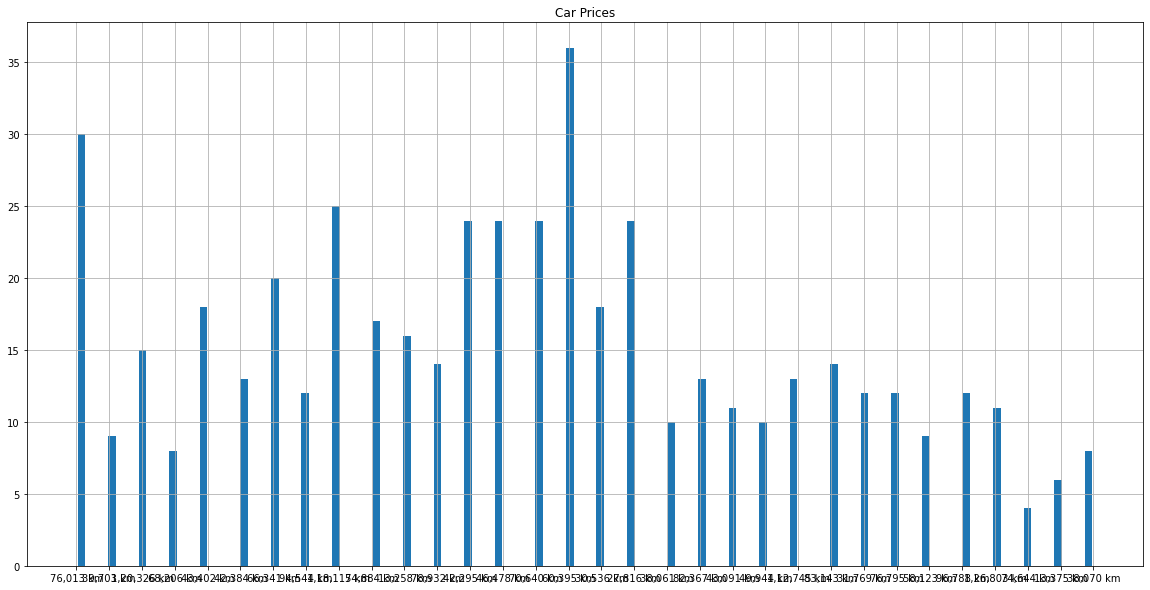

In [15]:
df['km_driven'].hist(bins=100,figsize=(20,10),rwidth = 0.75)
plt.title('Car Prices')
plt.show()

#### Using LabelEncoder for convering categorical to numerical

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['name'] = encoder.fit_transform(df['name'])
df['selling_price'] = encoder.fit_transform(df['selling_price'])
df['km_driven'] = encoder.fit_transform(df['km_driven'])
df['fuel'] = encoder.fit_transform(df['fuel'])
df['transmission'] = encoder.fit_transform(df['transmission'])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     492 non-null    int64
 1   name           492 non-null    int32
 2   selling_price  492 non-null    int32
 3   km_driven      492 non-null    int32
 4   fuel           492 non-null    int32
 5   transmission   492 non-null    int32
dtypes: int32(5), int64(1)
memory usage: 13.6 KB


All columns are converted into numerical now

#### Dividing data into X and Y

In [22]:
x=df.drop(['selling_price',],axis=1)
y=df['selling_price']

In [23]:
x.shape

(492, 5)

In [24]:
y.shape

(492,)

### scaling X values

In [25]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(x)


In [26]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [27]:
pd.DataFrame(x).describe()

,0,1,2,3,4
count,492.000000,492.000000,492.000000,492.000000,492.0
mean,0.500000,0.489126,0.500590,0.274390,0.0
std,0.289557,0.307474,0.292714,0.446661,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.250000,0.250000,0.225806,0.000000,0.0
50%,0.500000,0.500000,0.516129,0.000000,0.0
75%,0.750000,0.750000,0.741935,1.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,0.0


data have been scalled

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [30]:
x_train.shape

(359, 5)

In [31]:
x_test.shape

(133, 5)

In [32]:
y_train.shape

(359,)

In [33]:
y_test.shape

(133,)

### Model building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

### RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.999977270955329


In [36]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.003425563909774441
MAE: 0.016691729323308296
r2_score: 0.9999609949397191


### DECISION TREE CLASSIFIER

In [37]:
from sklearn.tree import DecisionTreeRegressor

DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)


1.0


In [38]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.0
MAE: 0.0
r2_score: 1.0


### GradientBoostingRegressor

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.9943160093391233


In [40]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.4058156986432549
MAE: 0.46788076456927175
r2_score: 0.9951320283288855


##### cross validation

In [41]:
from sklearn.model_selection import cross_val_score

np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
            
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 43.601322, 5.531716
RF    : 0.004419, 0.006596
DTR    : 0.000000, 0.000000
GBR    : 0.482798, 0.119196


Accourding to all metrics score selecting the Random Forest Regression as for GridSeachCV

#### HYPER PARAMETER TUNING:
GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators' : [100,150],
               'min_samples_leaf' : [1,2], 
              'min_samples_split': [2,3],
              'criterion': ['mse','mae']
}

In [43]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [44]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [100, 150]})

In [45]:
GCV.best_params_

{'criterion': 'mse',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [46]:
mod = RandomForestRegressor(min_samples_leaf= 1, min_samples_split =2, n_estimators = 150, criterion='mse')
mod.fit(x_train,y_train)
pred = mod.predict(x_test)
mod.score(x_test,y_test)

0.9999781020300708

In [47]:
scr = cross_val_score(mod, x,y, cv=4)
print(scr.mean())

0.9999361275609154


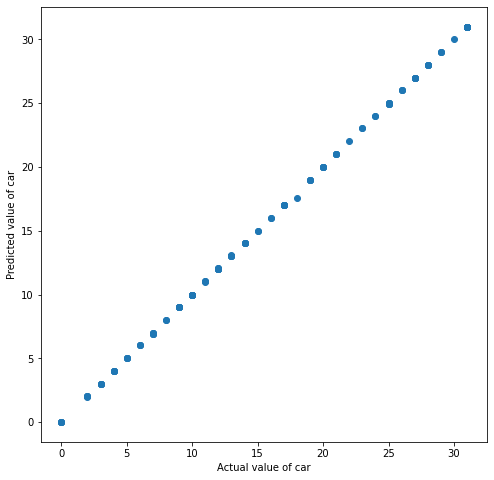

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, pred)
plt.xlabel("Actual value of car")
plt.ylabel("Predicted value of car")
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

#### saving the model

In [49]:
import joblib
joblib.dump(GCV,'car_price_prediction.obj')

['car_price_prediction.obj']